In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
from IPython import display

In [3]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 1. Create Data

In [4]:
nPerclust = 100
blur = 1

# Center of two class labels
# x any y corrdintates 
A = [1,1]    # class1
B = [5,1]    # class2

# Generate Data

a = [A[0] + np.random.randn(nPerclust)*blur , 
     A[1] + np.random.randn(nPerclust)*blur]

b = [B[0] + np.random.randn(nPerclust)*blur , 
     B[1] + np.random.randn(nPerclust)*blur]

# True Labels
labels_np = np.vstack((np.zeros((nPerclust,1)),
                      np.ones((nPerclust,1))
                      ))

# COncatenate into matrix
data_np = np.hstack((a,b)).T

# Convert to Pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

## 2. Plotting data

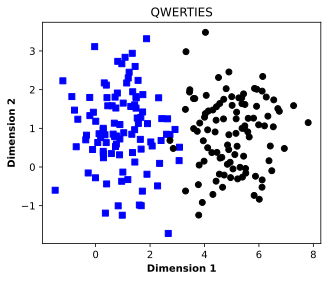

In [5]:
plt.figure(figsize = (5,4) , dpi = 130)

plt.plot(data[np.where(labels == 0)[0],0],
        data[np.where(labels == 0)[0],1],'bs')

plt.plot(data[np.where(labels == 1)[0],0],
        data[np.where(labels == 1)[0],1] , 'ko')

plt.title("QWERTIES")
plt.xlabel("Dimension 1" , fontweight = "bold")
plt.ylabel("Dimension 2" , fontweight = "bold")

plt.show()

## 3. Function to Build the MultiLayer ANN Model

In [6]:
def createANNmodel(learningrate):
    
    # MOdel Architecture
    ANNclassify = nn.Sequential(
                            # Input Layer : 2-inputs ,16-Neurons and 16 outputs
                            nn.Linear(2,16),
                            nn.ReLU(),
        
                            # Hidden Layer : 16-inputs , 1-Neuron and 1-output
                            nn.Linear(16,1),
                            nn.ReLU(),
                            
                            # Output Layer : 1-input , 1-Neuron and 1-output
                            nn.Linear(1,1),
                            nn.Sigmoid()
                           )
    # Loss Function
    lossfunc = nn.BCELoss()
    
    # Optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = learningrate)
    
    return ANNclassify,lossfunc,optimizer

In [20]:
ANNclassify , Lossfunc , Optimzer = createANNmodel(learningrate = 0.01)

In [21]:
Lossfunc

BCELoss()

In [22]:
Optimzer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## 4. Function that trains the model

In [23]:
def trainthemodel(ANNmodel , lossfunc , optimizer , epochs ,data ):
    
    # Intialize the losses array
    losses = torch.zeros(epochs)

    for epoci in range(epochs):

        # Forward Propagation
        y_hat = ANNmodel(data)

        # Compute Losses
        loss = lossfunc(y_hat , labels)
        losses[epoci] = loss

        # Backpropagation
        optimizer.zero_grad()  # reinitialize
        loss.backward()
        optimizer.step()
        
        
    # Final Forward Pass
    predictions = ANNmodel(data)
    
    # Outputs from the ouputlayer are between 0-1 (probability <--- sigmoid function)
    totalacc = 100*torch.mean( ( (predictions > 0.5) == labels ).float() )
    
    return losses ,predictions, totalacc

#### Testing

In [24]:
ANNclassify , Lossfunc , Optimzer = createANNmodel(learningrate = 0.01)

In [25]:
numepochs = 1000

losses , predictions , totalacc = trainthemodel(ANNmodel = ANNclassify,
                                                lossfunc = Lossfunc,
                                                optimizer = Optimzer,
                                                epochs = numepochs ,
                                                data = data )

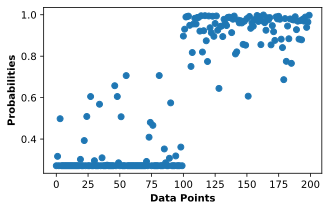

In [28]:
plt.figure(figsize = (5,3) ,dpi =140)
plt.plot(predictions.detach() ,"o")

plt.xlabel("Data Points" , fontweight = "bold")
plt.ylabel("Probabilities" , fontweight = "bold")
plt.show()

#### Plotting

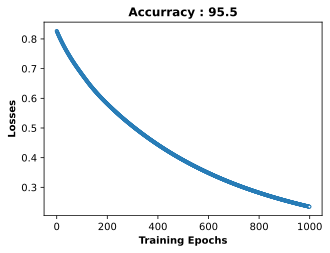

In [27]:
plt.figure(figsize = (5,3.5) , dpi = 140 )

plt.plot(losses.detach(), ".-" , markerfacecolor = "w" , linewidth = 0.1)

plt.xlabel("Training Epochs" , fontweight = "bold")
plt.ylabel("Losses" , fontweight = "bold")

plt.title(f"Accurracy : {totalacc}" , fontweight = "bold")

plt.show()

## 5. Parametric Experiment with MultiLayer ANN Model

In [15]:
numepochs = 1000
lrs = np.linspace(start = 0.001 , stop = 0.1, num = 40 )

Accbylr = []
allLosses = np.zeros((len(lrs) ,numepochs ))

# Loop through learning rate
for i,lr in enumerate(lrs):
    
    # Create and Run the Model
    ANNclassify , Lossfunc , Optimzer = createANNmodel(learningrate = lr)
    
    losses , predictions , totalacc = trainthemodel(ANNmodel = ANNclassify,
                                                    lossfunc = Lossfunc,
                                                    optimizer = Optimzer,
                                                    epochs = numepochs ,
                                                    data = data )
    
    # Store the Results
    Accbylr.append(totalacc)
    allLosses[i,:] = losses.detach()


In [16]:
allLosses

array([[0.77845633, 0.77841723, 0.77837807, ..., 0.74667716, 0.74665177,
        0.7466265 ],
       [0.77008849, 0.76994246, 0.76979661, ..., 0.70650244, 0.70647919,
        0.70645601],
       [1.0124985 , 0.9780243 , 0.94563246, ..., 0.42244449, 0.42217407,
        0.42190376],
       ...,
       [0.70852607, 0.70474416, 0.70138216, ..., 0.69314718, 0.69314718,
        0.69314718],
       [0.71701694, 0.71575564, 0.71456307, ..., 0.69314718, 0.69314718,
        0.69314718],
       [0.83196712, 0.793239  , 0.7851755 , ..., 0.04676242, 0.04674212,
        0.04672185]])

In [17]:
allLosses.T

array([[0.77845633, 0.77008849, 1.0124985 , ..., 0.70852607, 0.71701694,
        0.83196712],
       [0.77841723, 0.76994246, 0.9780243 , ..., 0.70474416, 0.71575564,
        0.793239  ],
       [0.77837807, 0.76979661, 0.94563246, ..., 0.70138216, 0.71456307,
        0.7851755 ],
       ...,
       [0.74667716, 0.70650244, 0.42244449, ..., 0.69314718, 0.69314718,
        0.04676242],
       [0.74665177, 0.70647919, 0.42217407, ..., 0.69314718, 0.69314718,
        0.04674212],
       [0.7466265 , 0.70645601, 0.42190376, ..., 0.69314718, 0.69314718,
        0.04672185]])

In [18]:
allLosses.shape

(40, 1000)

### Plotting

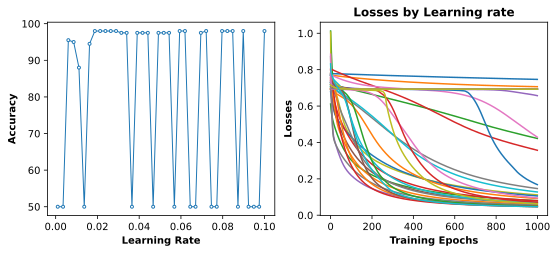

In [19]:
fig,ax = plt.subplots(nrows= 1 , ncols= 2 , figsize = (9,3.5) ,dpi = 130)

# Accuracy versus Learning rate Plot
ax[0].plot(lrs , Accbylr, ".-" , markerfacecolor = "w" , linewidth = 1)

ax[0].set_xlabel("Learning Rate" , fontweight = "bold")
ax[0].set_ylabel("Accuracy" , fontweight = "bold")

# Losses versus Training epochs with different learning rates
# Column-wise plotting   
ax[1].plot(allLosses.T) 

ax[1].set_xlabel("Training Epochs" , fontweight = "bold")
ax[1].set_ylabel("Losses" , fontweight = "bold")

ax[1].set_title("Losses by Learning rate" ,fontweight = "bold")

plt.show()